In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.gridspec import GridSpec
import pickle

plt.style.use('hfs')

In [3]:
#IIbs = pd.read_csv('results_IIb.dat')
#IIs = pd.read_csv('results_II.dat')
IIbs_og = pd.read_csv('params_best_GP_IIb.dat')
IIs_og = pd.read_csv('params_best_GP_II.dat')

IIbs = pd.read_csv('params_best_GP_IIb.dat')
IIs = pd.read_csv('params_best_GP_II.dat')

IIbs_SKL = pd.read_csv('params_best_GP_IIb_SKL.dat')
IIs_SKL = pd.read_csv('params_best_GP_II_SKL.dat')

In [4]:
IIbs

,event,texp,trise,dm1,dm2,dm4030
0,SN2008ax,54528.30,20.012331,34.884962,42.030075,0.664096
1,SN2011dh,55712.40,18.502968,36.534687,41.649543,0.728440
2,SN1993J,49073.05,21.999624,29.261654,0.959398,0.648006
3,SN2006T,53759.00,21.456241,60.024812,42.786917,0.764074
4,SN2004ex,53287.85,20.520075,2.103459,2.979900,0.717333
5,SN2008aq,54513.00,18.414082,34.982362,40.759265,0.658683
6,SN2013df,56448.20,21.083333,35.666491,0.406842,0.728019
7,SN2006el,53959.00,24.599014,46.591593,55.909912,0.582495


Text(0.5, 0, 'dm2')

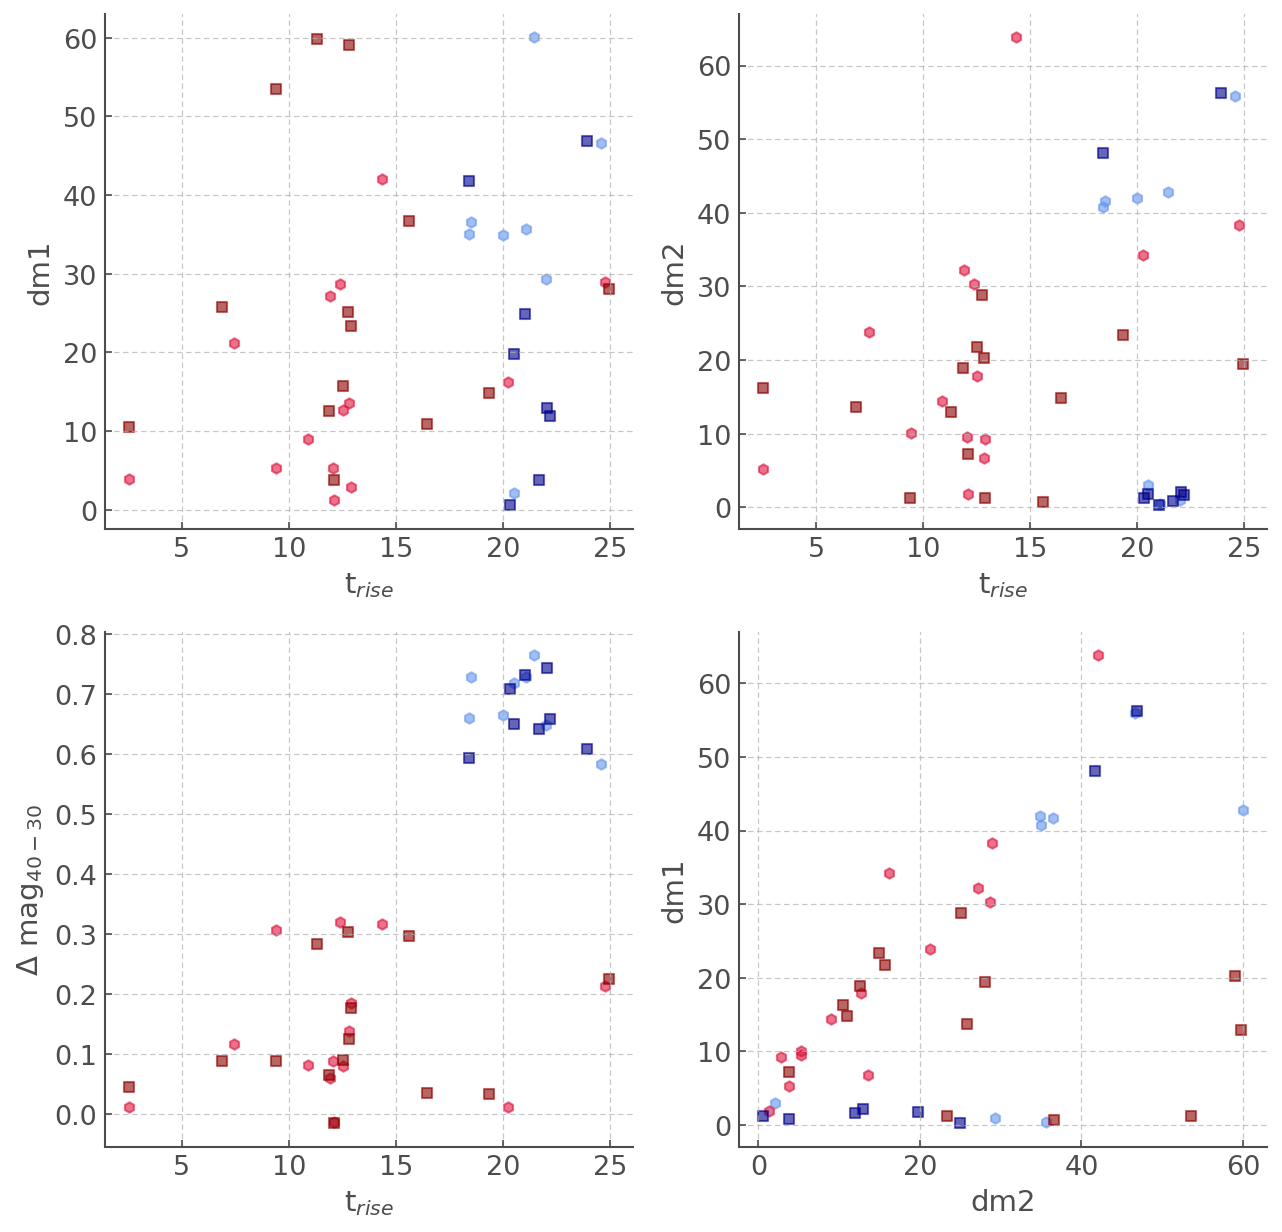

In [5]:
f, ax = plt.subplots(ncols=2, nrows=2, figsize=(10,10))
ax[0,0].scatter(IIbs.trise, IIbs.dm1, color='cornflowerblue', alpha=0.6, marker='h')
ax[0,0].scatter(IIs.trise, IIs.dm1, color='crimson', alpha=0.6, marker='h')

ax[0,1].scatter(IIbs.trise, IIbs.dm2, color='cornflowerblue', alpha=0.6, marker='h')
ax[0,1].scatter(IIs.trise, IIs.dm2, color='crimson', alpha=0.6, marker='h')

ax[1,0].scatter(IIbs.trise, IIbs.dm4030, color='cornflowerblue', alpha=0.6, marker='h')
ax[1,0].scatter(IIs.trise, IIs.dm4030, color='crimson', alpha=0.6, marker='h')

ax[1,1].scatter(IIbs.dm1, IIbs.dm2, color='cornflowerblue', alpha=0.6, marker='h')
ax[1,1].scatter(IIs.dm1, IIs.dm2, color='crimson', alpha=0.6, marker='h')



ax[0,0].scatter(IIbs_SKL.trise, IIbs_SKL.dm1, color='darkblue', alpha=0.6, marker='s')
ax[0,0].scatter(IIs_SKL.trise, IIs_SKL.dm1, color='darkred', alpha=0.6, marker='s')

ax[0,1].scatter(IIbs_SKL.trise, IIbs_SKL.dm2, color='darkblue', alpha=0.6, marker='s')
ax[0,1].scatter(IIs_SKL.trise, IIs_SKL.dm2, color='darkred', alpha=0.6, marker='s')

ax[1,0].scatter(IIbs_SKL.trise, IIbs_SKL.dm4030, color='darkblue', alpha=0.6, marker='s')
ax[1,0].scatter(IIs_SKL.trise, IIs_SKL.dm4030, color='darkred', alpha=0.6, marker='s')

ax[1,1].scatter(IIbs_SKL.dm1, IIbs_SKL.dm2, color='darkblue', alpha=0.6, marker='s')
ax[1,1].scatter(IIs_SKL.dm1, IIs_SKL.dm2, color='darkred', alpha=0.6, marker='s')


### prettify
ax[0,0].set_ylabel('dm1')
ax[0,0].set_xlabel('t$_{rise}$')
ax[0,1].set_ylabel('dm2')
ax[0,1].set_xlabel('t$_{rise}$')
ax[1,0].set_ylabel('$\Delta$ mag$_{40-30}$')
ax[1,0].set_xlabel('t$_{rise}$')
ax[1,1].set_ylabel('dm1')
ax[1,1].set_xlabel('dm2')

### comment:
 so dm1 and dm2 as expected very volatile the t rise and delta mags not so much and in fact they seems to show some separation in the delta mag /t rise space. 
 
 (note: the only visual separation in the top plots is because of the t rise and also ti's adjacent not separate unlike in pessi19 - need in the conclusion to give acount of what is stable and what isn't in this case the separation in delta mag t rise space is interesting and a larger sample (atlas hello) would help confirm if that remains true in general and there we can segue into why atlas is perfet for this type of analysis). 

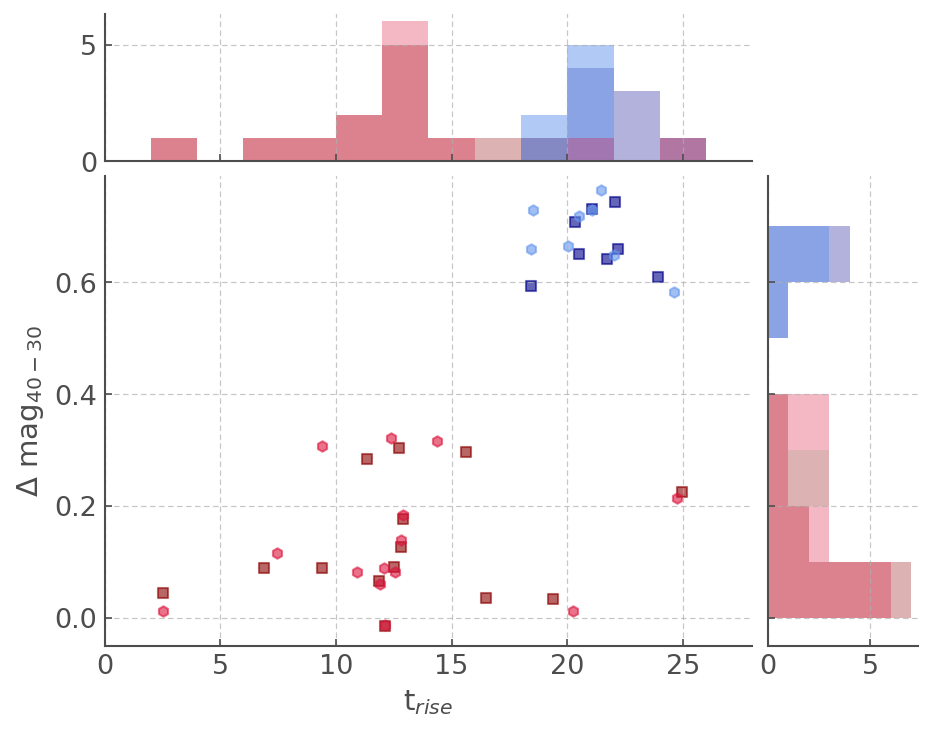

In [6]:
x_lo, x_hi = 0, 28
y_lo, y_hi = -0.05, 0.79
# =================================

fig = plt.figure(figsize=(7,7))
gs = GridSpec(5, 5, wspace=0.1, hspace=0.1)

# y then x
axBIG = fig.add_subplot(gs[1:4, :4])
axTOP = fig.add_subplot(gs[0, :4])
axRYT = fig.add_subplot(gs[1:4, 4])

axBIG.scatter(IIbs_SKL.trise, IIbs_SKL.dm4030, color='darkblue', alpha=0.6, marker='s')
axBIG.scatter(IIs_SKL.trise, IIs_SKL.dm4030, color='darkred', alpha=0.6, marker='s')

axBIG.scatter(IIbs.trise, IIbs.dm4030, color='cornflowerblue', alpha=0.6, marker='h')
axBIG.scatter(IIs.trise, IIs.dm4030, color='crimson', alpha=0.6, marker='h')

__ = axTOP.hist(IIbs_SKL.trise, color='darkblue', alpha=0.3, bins=np.arange(0,30,2))
__ = axTOP.hist(IIs_SKL.trise, color='darkred', alpha=0.3, bins=np.arange(0,30,2))

__ = axTOP.hist(IIbs.trise, color='cornflowerblue', alpha=0.5, bins=np.arange(0,30,2))
__ = axTOP.hist(IIs.trise, color='crimson', alpha=0.3, bins=np.arange(0,30,2))

__ = axRYT.hist(IIbs_SKL.dm4030, color='darkblue', bins=np.arange(0, 0.8, 0.1),
                alpha=0.3, orientation='horizontal')
__ = axRYT.hist(IIs_SKL.dm4030, color='darkred', bins=np.arange(0, 0.8, 0.1),
                alpha=0.3, orientation='horizontal')

__ = axRYT.hist(IIbs.dm4030, orientation='horizontal', bins=np.arange(0, 0.8, 0.1),
                color='cornflowerblue', 
                alpha=0.5)
__ = axRYT.hist(IIs.dm4030, color='crimson', alpha=0.3, bins=np.arange(0, 0.8, 0.1),
                orientation='horizontal', 
                )

axTOP.xaxis.set_ticklabels([])
axRYT.yaxis.set_ticklabels([])

for ax in [axBIG, axTOP]:
    ax.set_xlim([x_lo, x_hi])
    
for ax in [axBIG, axRYT]:
    ax.set_ylim([y_lo, y_hi])
    
axBIG.set_ylabel('$\Delta$ mag$_{40-30}$')
axBIG.set_xlabel('t$_{rise}$')

plt.savefig('Dmag_trise.png', bbox_inches='tight')

# Errors on trise tmax

In [7]:
def sampled_LC_params(t, V, alpha=0.01):
    _mag_interp=V
    _time_interp = t

    _ind_tmax=_mag_interp.argmax()
    t_max = _time_interp[_ind_tmax]
    #ax1.plot(_time_interp, _mag_interp, c='k', label='GP', alpha=alpha)
    
    #x_30_40 = np.atleast_2d(np.array([30, 40])).T
    i30, i40 = np.argwhere(np.isclose(t,30))[0], np.argwhere(np.isclose(t,40))[0]
    mag_30_40 = [_mag_interp[i30], _mag_interp[i40]]

    # DELTA MAG 40 30
    dm_40_30 = (mag_30_40[1]-mag_30_40[0])*-1
    
    #ax1.axvline(_time_interp[_ind_tmax],c='k', label='t_max', alpha=alpha)
    #ax1.axvline(30,c='k', ls=':', alpha=alpha)
    #ax1.axvline(40,c='k', ls=':', alpha=alpha)

    ### FIRST DERIVATIVE 
    grad1 = np.gradient(_mag_interp)[_ind_tmax:] # after max
    #ax2.plot(_time_interp, np.gradient(_mag_interp),lw=1, color='r', ls='--', alpha=alpha)
    #ax2.plot(_time_interp[_ind_tmax:], grad1, color='r', alpha=alpha)

    # need second derivative to get the maximum
    grad2 = np.gradient(grad1) # important to not cut V_interp otherwise fucked

    # this finds the locations where grad2 goes from positive to negative - indicating peaks in grad1
    argmax_grad1 = [False] + [True if grad2[i]<0 and grad2[i-1]>0  else False for i in np.arange(1,grad2.shape[0])]
    t_dm1 = _time_interp[_ind_tmax:][argmax_grad1][0]

    # plotting location of t_dm1
    #ax2.axvline(t_dm1, c='darkred', lw=1, alpha=alpha)
    #ax1.axvline(t_dm1, c='darkred',  ls=':',label='t_dm1', alpha=alpha)

    ### SECOND DERIVATIVE 
    ax3.plot(_time_interp[1:], np.gradient(np.gradient(_mag_interp))[1:],lw=1,  
             color='b', ls='--', alpha=alpha)
    ax3.plot(_time_interp[_ind_tmax:], grad2, color='b', alpha=alpha)
    grad3 = np.gradient(grad2)
    argmax_grad2 = [False] + [True if grad3[i]<0 and grad3[i-1]>0  else False for i in np.arange(1,grad3.shape[0])]
    t_dm2 = _time_interp[_ind_tmax:][argmax_grad2][0]
    #ax3.axvline(t_dm2, c='cornflowerblue', lw=1, alpha=alpha)
    #ax1.axvline(t_dm2, c='cornflowerblue', ls='--', label='t_dm2', alpha=alpha)
    
    return t_max, t_dm1-t_max, t_dm2-t_max, dm_40_30[0]


In [8]:
trise_tmax = pd.DataFrame( columns=['event', 'texp', 'trise', 'e_trise', 'dm4030', 'e_dm4030'])
trise_tmax['event']=list(set(IIbs.event).union(set(IIs.event)))
trise_tmax = trise_tmax.set_index('event')

In [9]:
trise_tmax

,texp,trise,e_trise,dm4030,e_dm4030
event,,,,,
SN1999em,NaN,NaN,NaN,NaN,NaN
SN2009N,NaN,NaN,NaN,NaN,NaN
SN2006el,NaN,NaN,NaN,NaN,NaN
SN2009ib,NaN,NaN,NaN,NaN,NaN
SN2012aw,NaN,NaN,NaN,NaN,NaN
SN2004er,NaN,NaN,NaN,NaN,NaN
SN2014cx,NaN,NaN,NaN,NaN,NaN
SN2006T,NaN,NaN,NaN,NaN,NaN
SN2013df,NaN,NaN,NaN,NaN,NaN


In [10]:
data_IIb = pd.read_csv('../Data/IIb_clean_sample.dat', index_col=0)
data_II = pd.read_csv('../Data/II_clean_sample.dat', index_col=0)

In [11]:
sn='SN2008ax'

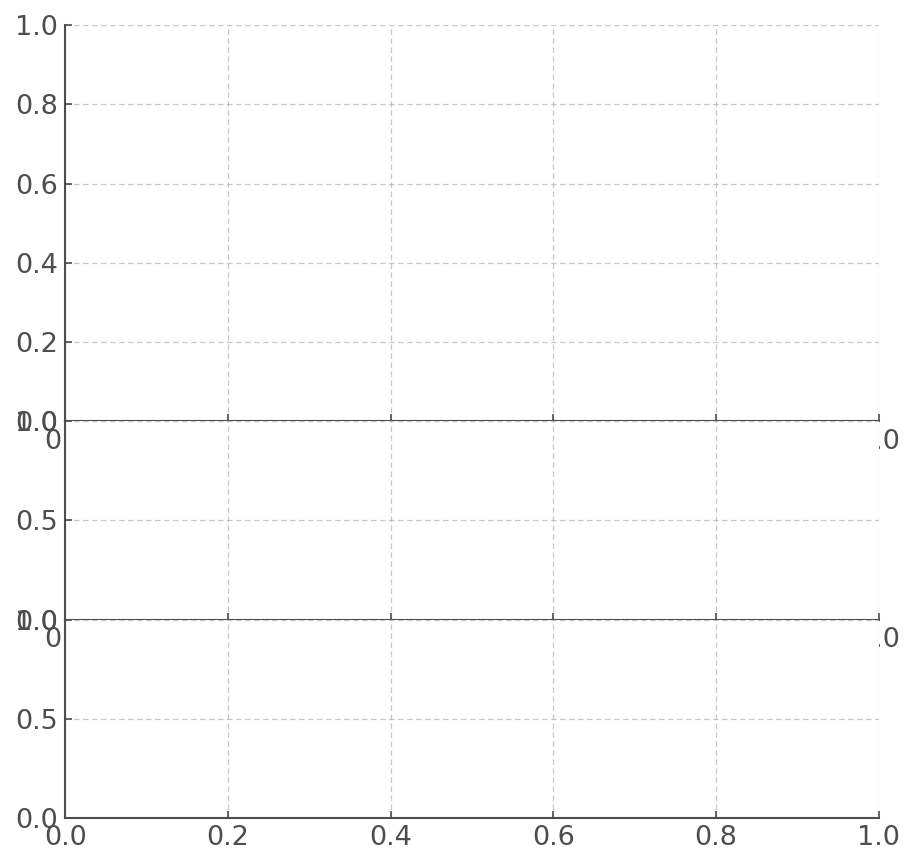

In [12]:
fig = plt.figure(figsize=(7,7))
gs = GridSpec(4, 4, hspace=0)
ax1 = fig.add_subplot(gs[:-2, :])
ax2 = fig.add_subplot(gs[2, :])
ax3 = fig.add_subplot(gs[3, :])

In [13]:
all_sn = []
all_tmax = []
all_dm4030 = []
for sn in trise_tmax.index.values:
    try:
        _data= data_IIb[data_IIb.event==sn]
        t_norm = _data.MJD.values - _data.texp.iloc[0]
    except IndexError:
        _data = data_II[data_II.event==sn]
        t_norm = _data.MJD.values - _data.texp.iloc[0]   



    t = np.atleast_2d(np.arange(int(t_norm.min()), int(t_norm.max())+1,0.05)).T
    if sn=='SN1993J':
        t = np.atleast_2d(np.arange(5, int(t_norm.max())+1,0.05)).T
    if sn=='SN2013df':
        t = np.atleast_2d(np.arange(10, int(t_norm.max())+1,0.05)).T
        
    _file = open(f'{sn}.gpym', 'rb')
    m = pickle.load(_file)

    _mag_interp, sigma = m.predict(t, full_cov=True)
    _mag_interp=_mag_interp[:,0]*-1

    test = np.random.multivariate_normal(_mag_interp,  sigma, size=200)
    ls_tmax = []
    ls_dm4030 = []
    for i in range(test.shape[0]):
        _v_i = test[i,:]
        _params = sampled_LC_params(t=t[:,0], V=_v_i, alpha=0.01)
        ls_tmax.append(_params[0])
        ls_dm4030.append(_params[-1])
        all_sn.append(sn)
        all_tmax.append(_params[0])
        all_dm4030.append(_params[-1])

    _file.close()

    trise_tmax.loc[sn].iloc[0] = _data.texp.iloc[0]
    trise_tmax.loc[sn].iloc[1:] = [np.mean(ls_tmax), np.std(ls_tmax), np.mean(ls_dm4030), np.std(ls_dm4030)]
    trise_tmax

In [14]:
trise_tmax

,texp,trise,e_trise,dm4030,e_dm4030
event,,,,,
SN1999em,51476.5,5.55325,5.46166,0.0116872,0.0614359
SN2009N,54845.4,23.228,12.4721,-0.0115596,0.0996695
SN2006el,53959,25.08,1.97079,0.592831,0.159579
SN2009ib,55045,12.174,1.76686,0.0643589,0.039671
SN2012aw,56002,14.374,4.98491,0.0828555,0.0445472
SN2004er,53271.8,13.214,1.87031,0.130069,0.0499356
SN2014cx,56896.9,25.613,17.3298,0.0932587,0.134982
SN2006T,53759,21.5245,0.933849,0.768311,0.0513023
SN2013df,56448.2,20.9725,1.20457,0.726847,0.121793


In [15]:
IIbs = trise_tmax.loc[IIbs_og.event.unique()]
IIs = trise_tmax.loc[IIs_og.event.unique()]

In [16]:
iib_mask = np.isin(all_sn, list(set(IIbs_og.event)))
ii_mask = np.isin(all_sn, list(set(IIs_og.event)))

In [17]:
iib_mask

array([False, False, False, ..., False, False, False])

In [18]:
trise_iib = np.array(all_tmax)[iib_mask]
trise_ii = np.array(all_tmax)[ii_mask]

dmag_iib = np.array(all_dm4030)[iib_mask]
dmag_ii = np.array(all_dm4030)[ii_mask]

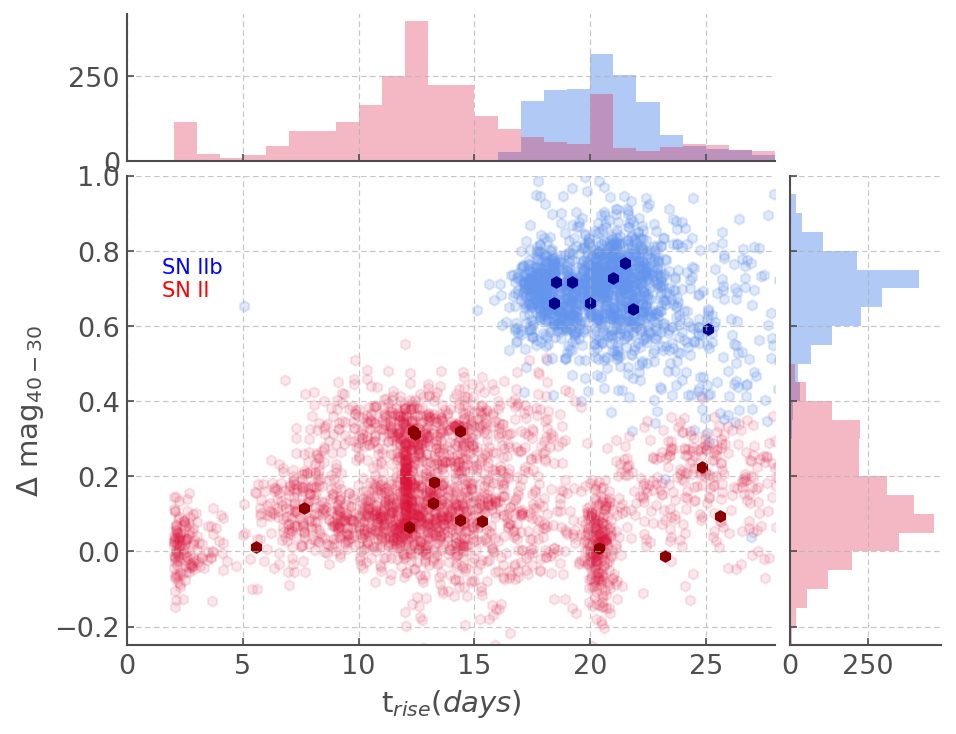

In [19]:
x_lo, x_hi = 0, 28
y_lo, y_hi = -0.25, 1
# =================================

fig = plt.figure(figsize=(7,7))
gs = GridSpec(5, 5, wspace=0.1, hspace=0.1)

# y then x
axBIG = fig.add_subplot(gs[1:4, :4])
axTOP = fig.add_subplot(gs[0, :4])
axRYT = fig.add_subplot(gs[1:4, 4])

axBIG.scatter(trise_iib, dmag_iib, color='cornflowerblue', alpha=0.2, marker='h')
axBIG.scatter(trise_ii, dmag_ii, color='crimson', alpha=0.1, marker='h')


__ = axTOP.hist(trise_iib, color='cornflowerblue', alpha=0.5, bins=np.arange(0,30,1))
__ = axTOP.hist(trise_ii, color='crimson', alpha=0.3, bins=np.arange(0,30,1))

__ = axRYT.hist(dmag_iib, orientation='horizontal', bins=np.arange(y_lo, y_hi, 0.05),
                color='cornflowerblue', 
                alpha=0.5)
__ = axRYT.hist(dmag_ii, color='crimson', alpha=0.3, bins=np.arange(y_lo, y_hi, 0.05),
                orientation='horizontal', 
                )


axBIG.scatter(IIbs.trise, IIbs.dm4030, color='darkblue', alpha=1, marker='h')
axBIG.scatter(IIs.trise, IIs.dm4030, color='darkred', alpha=1, marker='h')


axTOP.xaxis.set_ticklabels([])
axRYT.yaxis.set_ticklabels([])

for ax in [axBIG, axTOP]:
    ax.set_xlim([x_lo, x_hi])
    
for ax in [axBIG, axRYT]:
    ax.set_ylim([y_lo, y_hi])
    
axBIG.set_ylabel('$\Delta$ mag$_{40-30}$')
axBIG.set_xlabel('t$_{rise} (days)$')

axBIG.text(1.5,0.68, 'SN II', color='r')
axBIG.text(1.5,0.74, 'SN IIb', color='blue')
plt.savefig('Dmag_trise.png', bbox_inches='tight')

In [ ]:
trise_tmax

In [ ]:
trise_tmax.to_csv('trise_tmax_all.dat')

In [ ]:
__= plt.hist(np.array(all_tmax)[np.isin(np.array(all_sn), 'SN1999em')], 
             bins=np.arange(2,20,0.5), color='crimson', alpha=0.7)
plt.axvline(np.mean(np.array(all_tmax)[np.isin(np.array(all_sn), 'SN1999em')]), c='darkred', ls='--')
plt.ylabel('N')
plt.xlabel('t$_{rise} (days)$')
plt.text(11, 41, 'SN1999em')
plt.savefig('99em_trise.png', bbox_inches='tight')